# Mental Health in the Workplace: 

## A Data-Driven Analysis of Burnout and Well-being

This project explores a synthetic dataset simulating survey responses from 3,000 professionals across diverse roles and countries, designed to capture crucial aspects of workplace mental health, including burnout, stress, job satisfaction, and overall well-being.

My goal is to perform comprehensive data analysis, ranging from univariate to multivariate insights, and develop predictive models. Through this, I aim to uncover key mental health trends, identify potential burnout risks, and analyze how various workplace variables influence employee productivity and well-being.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

# Set style for plots
sns.set_style("whitegrid")

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/mental-health-and-burnout-in-the-workplace/mental_health_workplace_survey.csv')

In [3]:
# Display the first few rows
print("Head of the DataFrame:")
print(df.head())

Head of the DataFrame:
   EmployeeID  Age      Gender    Country            JobRole Department  \
0        1001   50        Male         UK    Sales Associate         HR   
1        1002   36        Male    Germany  Software Engineer         IT   
2        1003   29  Non-binary      India           IT Admin         IT   
3        1004   42        Male  Australia      HR Specialist         IT   
4        1005   40        Male     Brazil   Customer Support    Support   

   YearsAtCompany  WorkHoursPerWeek RemoteWork  BurnoutLevel  ...  \
0              14                47         No          3.37  ...   
1               1                59     Hybrid          7.39  ...   
2              13                59     Hybrid          7.10  ...   
3              15                31        Yes          4.18  ...   
4               6                34        Yes          8.28  ...   

   CommuteTime  HasMentalHealthSupport  ManagerSupportScore  HasTherapyAccess  \
0          117                

In [4]:
# Display general information about the DataFrame
print("\nInfo of the DataFrame:")
print(df.info())


Info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              3000 non-null   int64  
 1   Age                     3000 non-null   int64  
 2   Gender                  3000 non-null   object 
 3   Country                 3000 non-null   object 
 4   JobRole                 3000 non-null   object 
 5   Department              3000 non-null   object 
 6   YearsAtCompany          3000 non-null   int64  
 7   WorkHoursPerWeek        3000 non-null   int64  
 8   RemoteWork              3000 non-null   object 
 9   BurnoutLevel            3000 non-null   float64
 10  JobSatisfaction         3000 non-null   float64
 11  StressLevel             3000 non-null   float64
 12  ProductivityScore       3000 non-null   float64
 13  SleepHours              3000 non-null   float64
 14  PhysicalActivity

In [5]:
# Display missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
EmployeeID                0
Age                       0
Gender                    0
Country                   0
JobRole                   0
Department                0
YearsAtCompany            0
WorkHoursPerWeek          0
RemoteWork                0
BurnoutLevel              0
JobSatisfaction           0
StressLevel               0
ProductivityScore         0
SleepHours                0
PhysicalActivityHrs       0
CommuteTime               0
HasMentalHealthSupport    0
ManagerSupportScore       0
HasTherapyAccess          0
MentalHealthDaysOff       0
SalaryRange               0
WorkLifeBalanceScore      0
TeamSize                  0
CareerGrowthScore         0
BurnoutRisk               0
dtype: int64


### Univariate Analysis - Numerical Variables

In [6]:
numerical_cols = [
    'Age',
    'BurnoutLevel',
    'JobSatisfaction',
    'StressLevel',
    'ProductivityScore',
    'WorkHoursPerWeek',
    'SleepHours',
    'PhysicalActivityHrs',
    'ManagerSupportScore',
    'WorkLifeBalanceScore',
    'CareerGrowthScore',
    'CommuteTime'
]

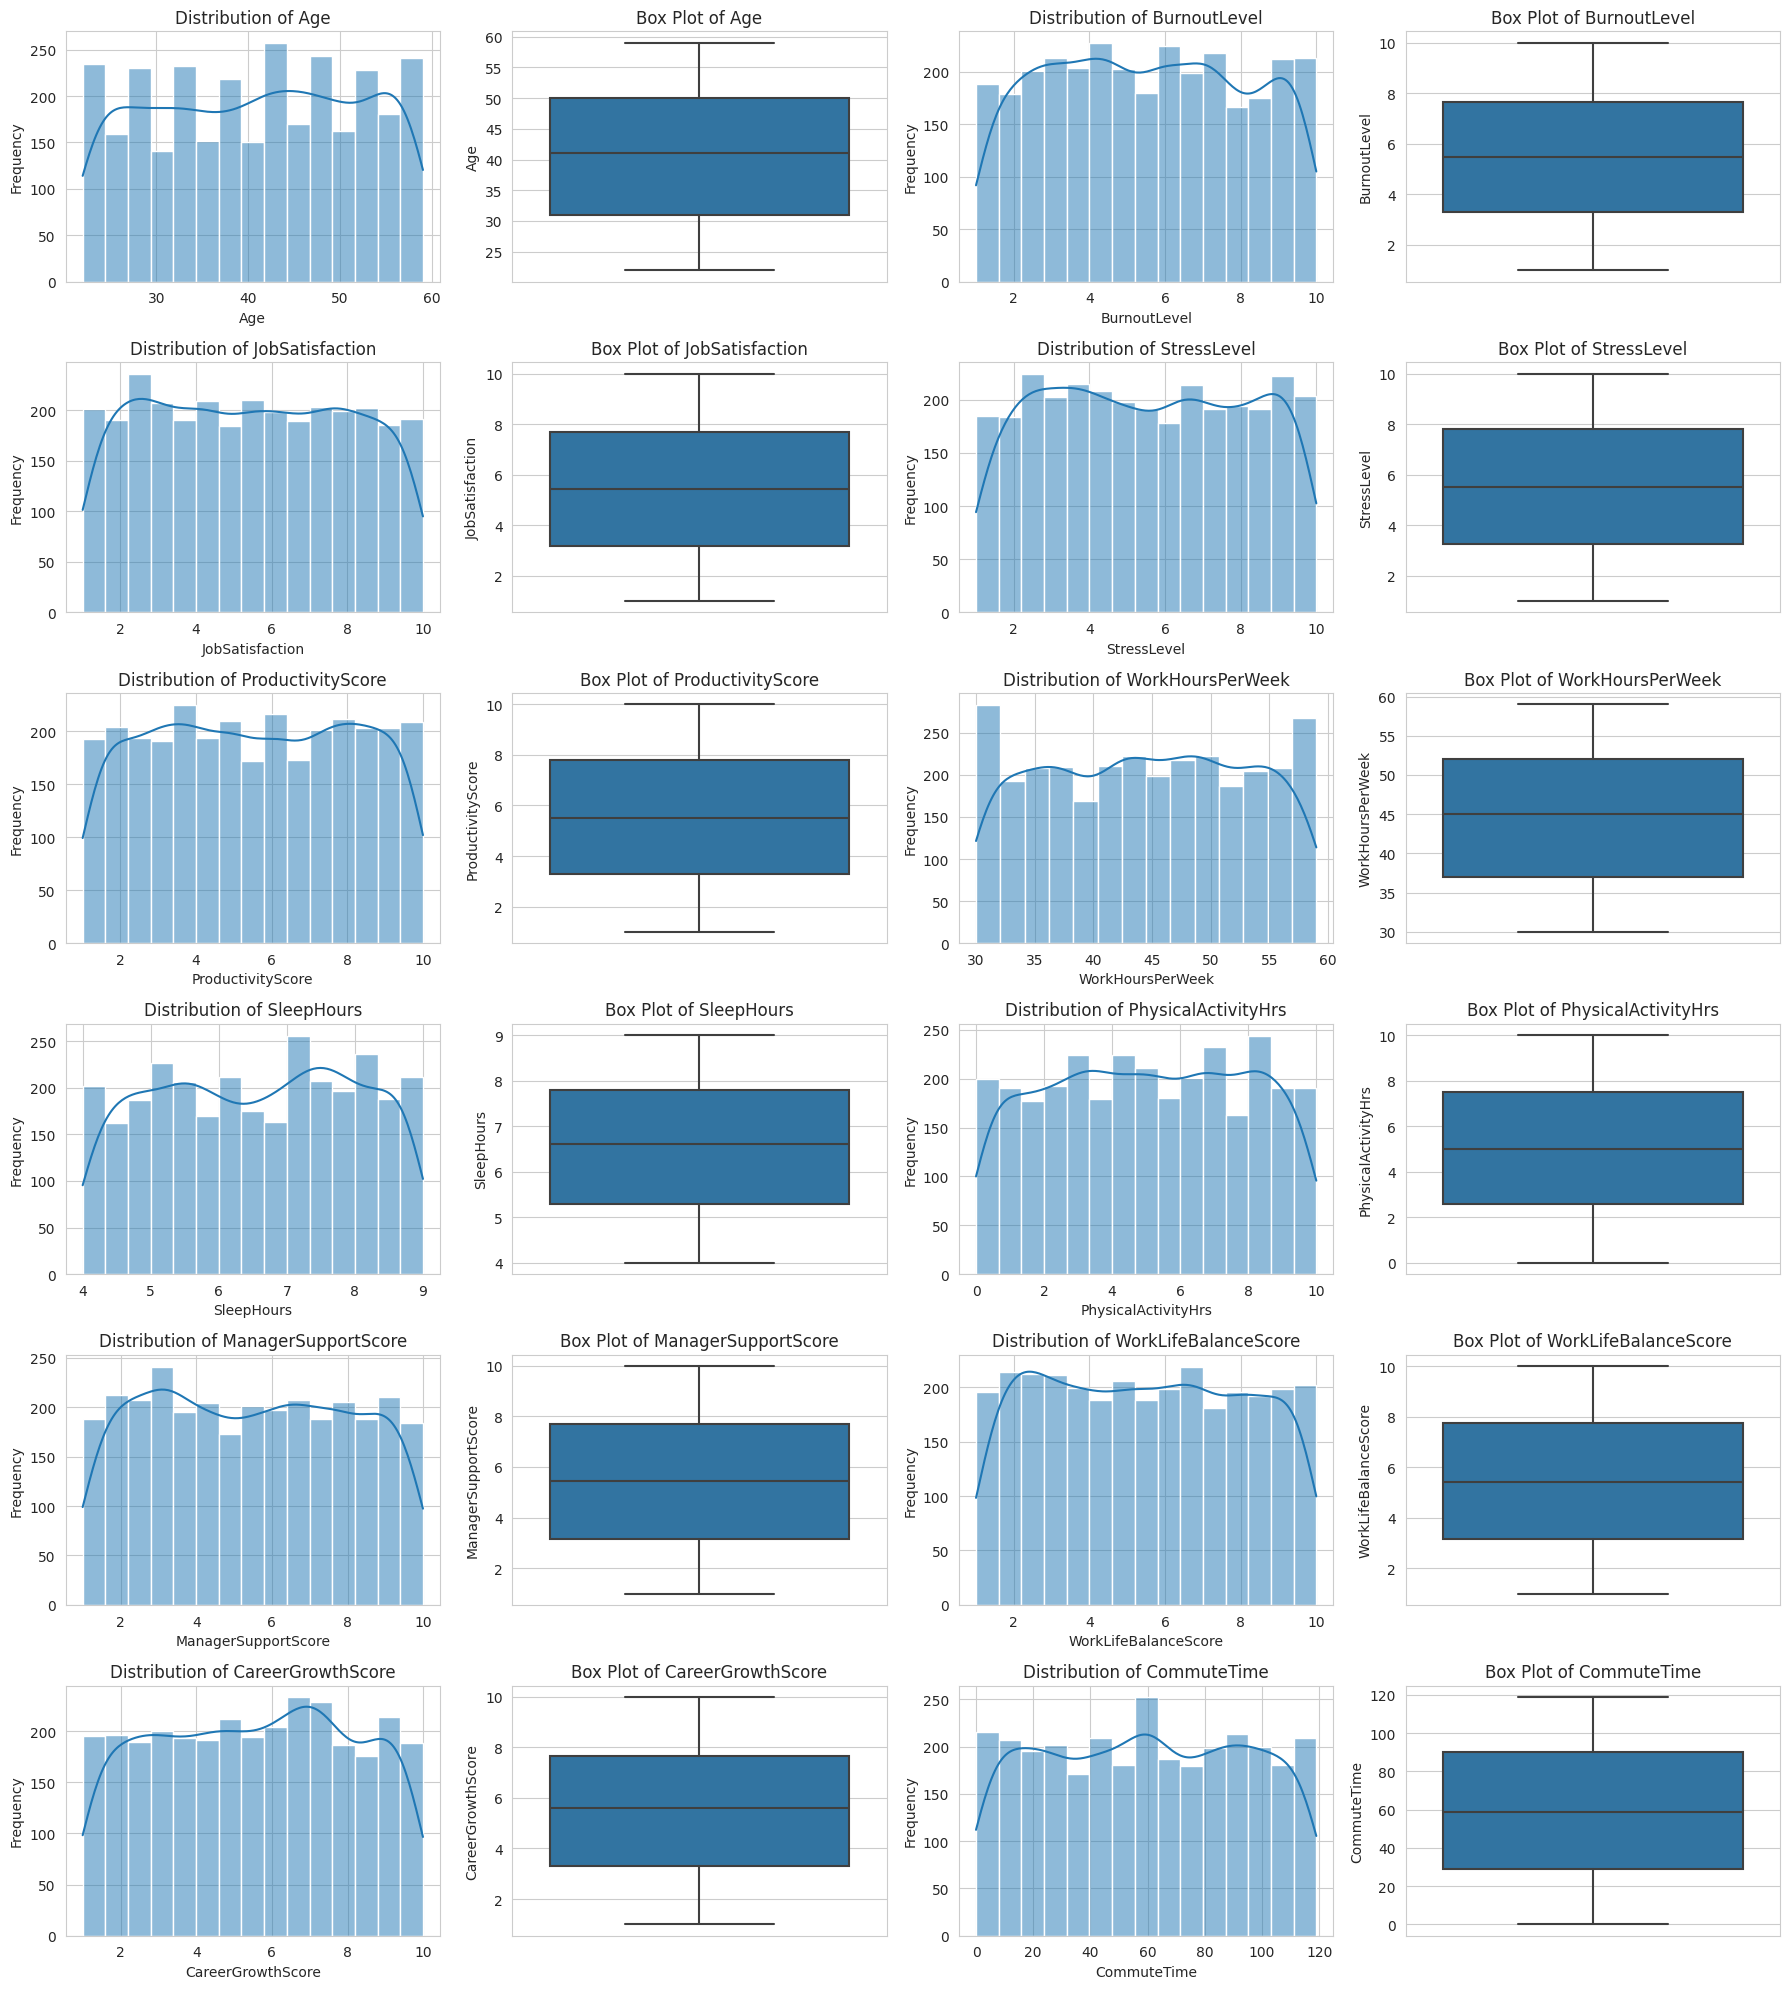

In [7]:
# Create histograms and box plots for numerical variables
plt.figure(figsize=(18, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 4, 2 * i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(6, 4, 2 * i + 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### Bivariate Analysis: Numerical vs. Numerical (Correlation Heatmap)

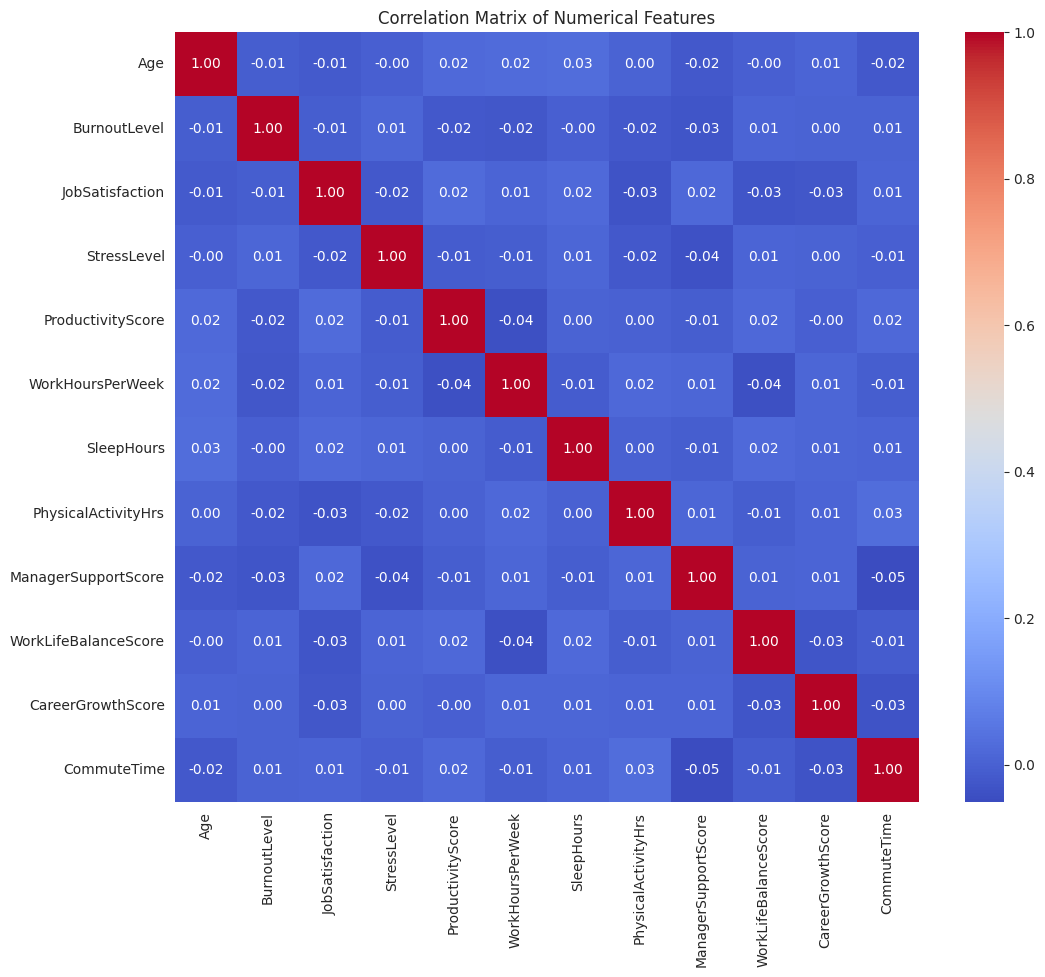

In [8]:
plt.figure(figsize=(12, 10))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Bivariate Analysis: Numerical vs. Target (Scatter Plots)

In [9]:
target_variables = ['BurnoutLevel', 'ProductivityScore', 'StressLevel', 'JobSatisfaction']
selected_numerical_features = [
    'Age',
    'WorkHoursPerWeek',
    'SleepHours',
    'PhysicalActivityHrs',
    'ManagerSupportScore',
    'WorkLifeBalanceScore',
    'CareerGrowthScore'
]

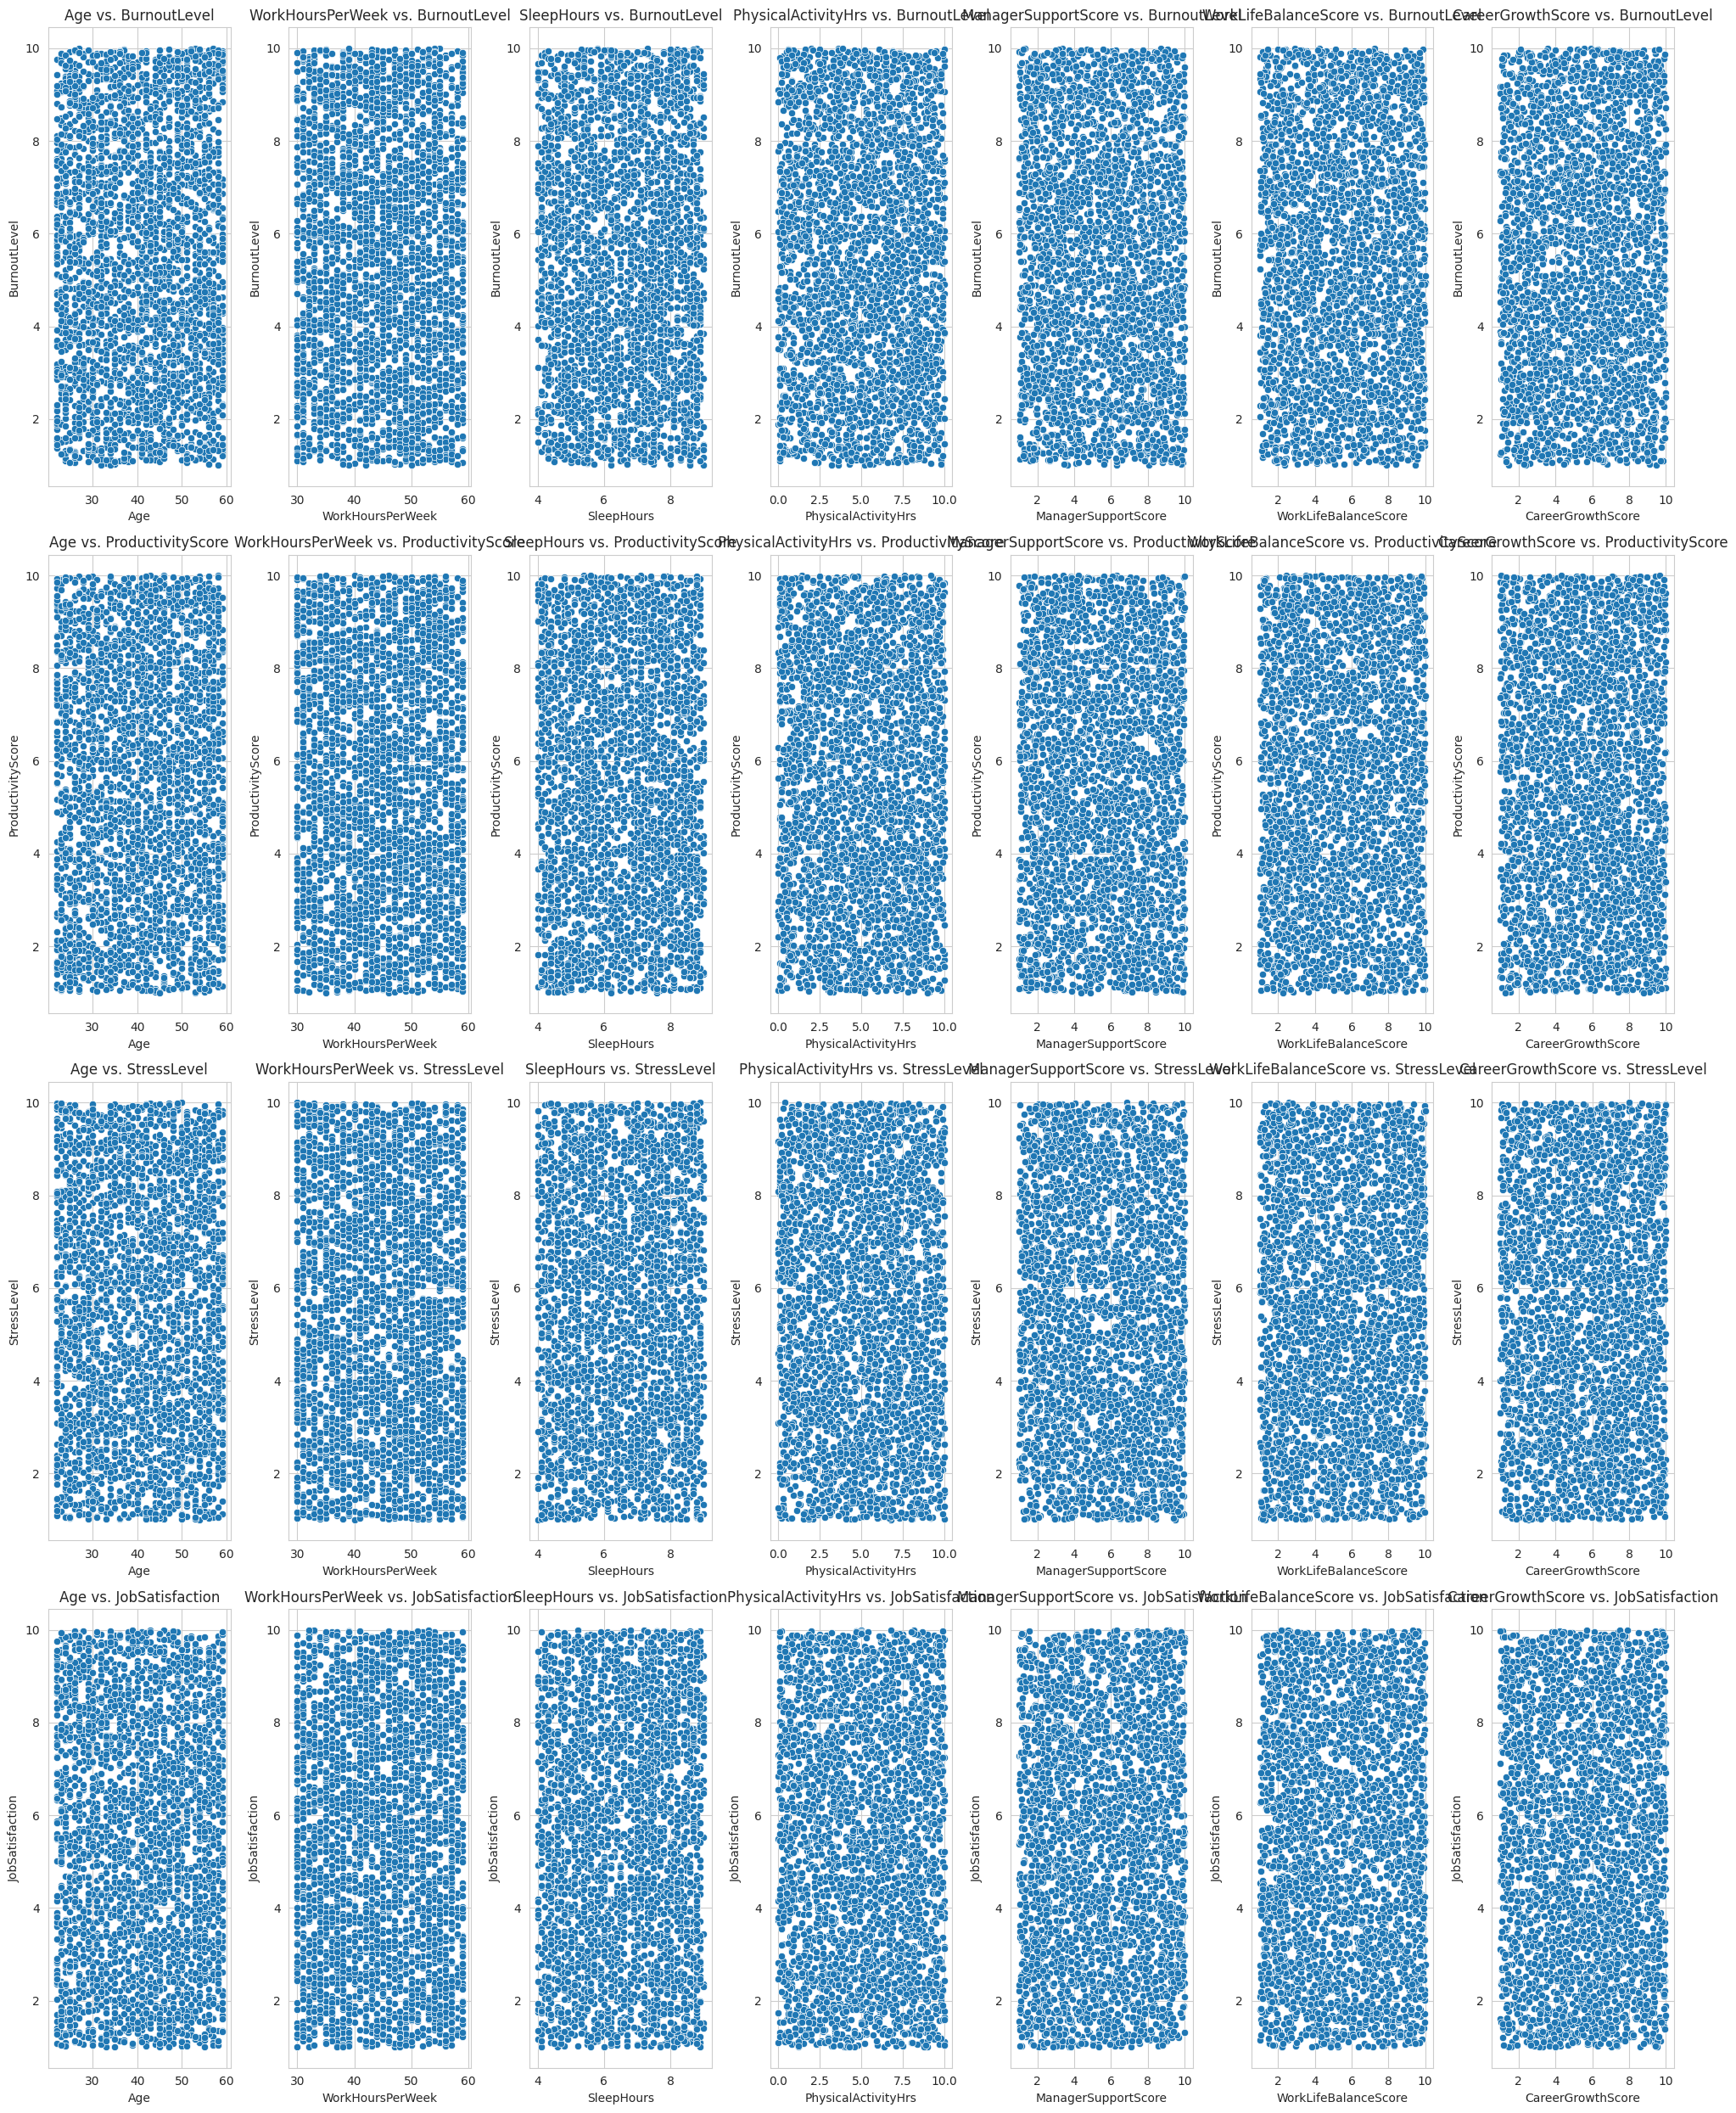

In [10]:
plt.figure(figsize=(20, 25))
for i, target in enumerate(target_variables):
    for j, feature in enumerate(selected_numerical_features):
        plot_num = i * len(selected_numerical_features) + j + 1
        plt.subplot(len(target_variables), len(selected_numerical_features), plot_num)
        sns.scatterplot(x=df[feature], y=df[target])
        plt.title(f'{feature} vs. {target}')
        plt.xlabel(feature)
        plt.ylabel(target)
plt.tight_layout()
plt.show()

### Bivariate Analysis: Categorical vs. Target (Box Plots)

In [11]:
selected_categorical_features = [
    'Gender',
    'Country',
    'Department',
    'RemoteWork',
    'HasMentalHealthSupport',
    'HasTherapyAccess',
    'SalaryRange'
]

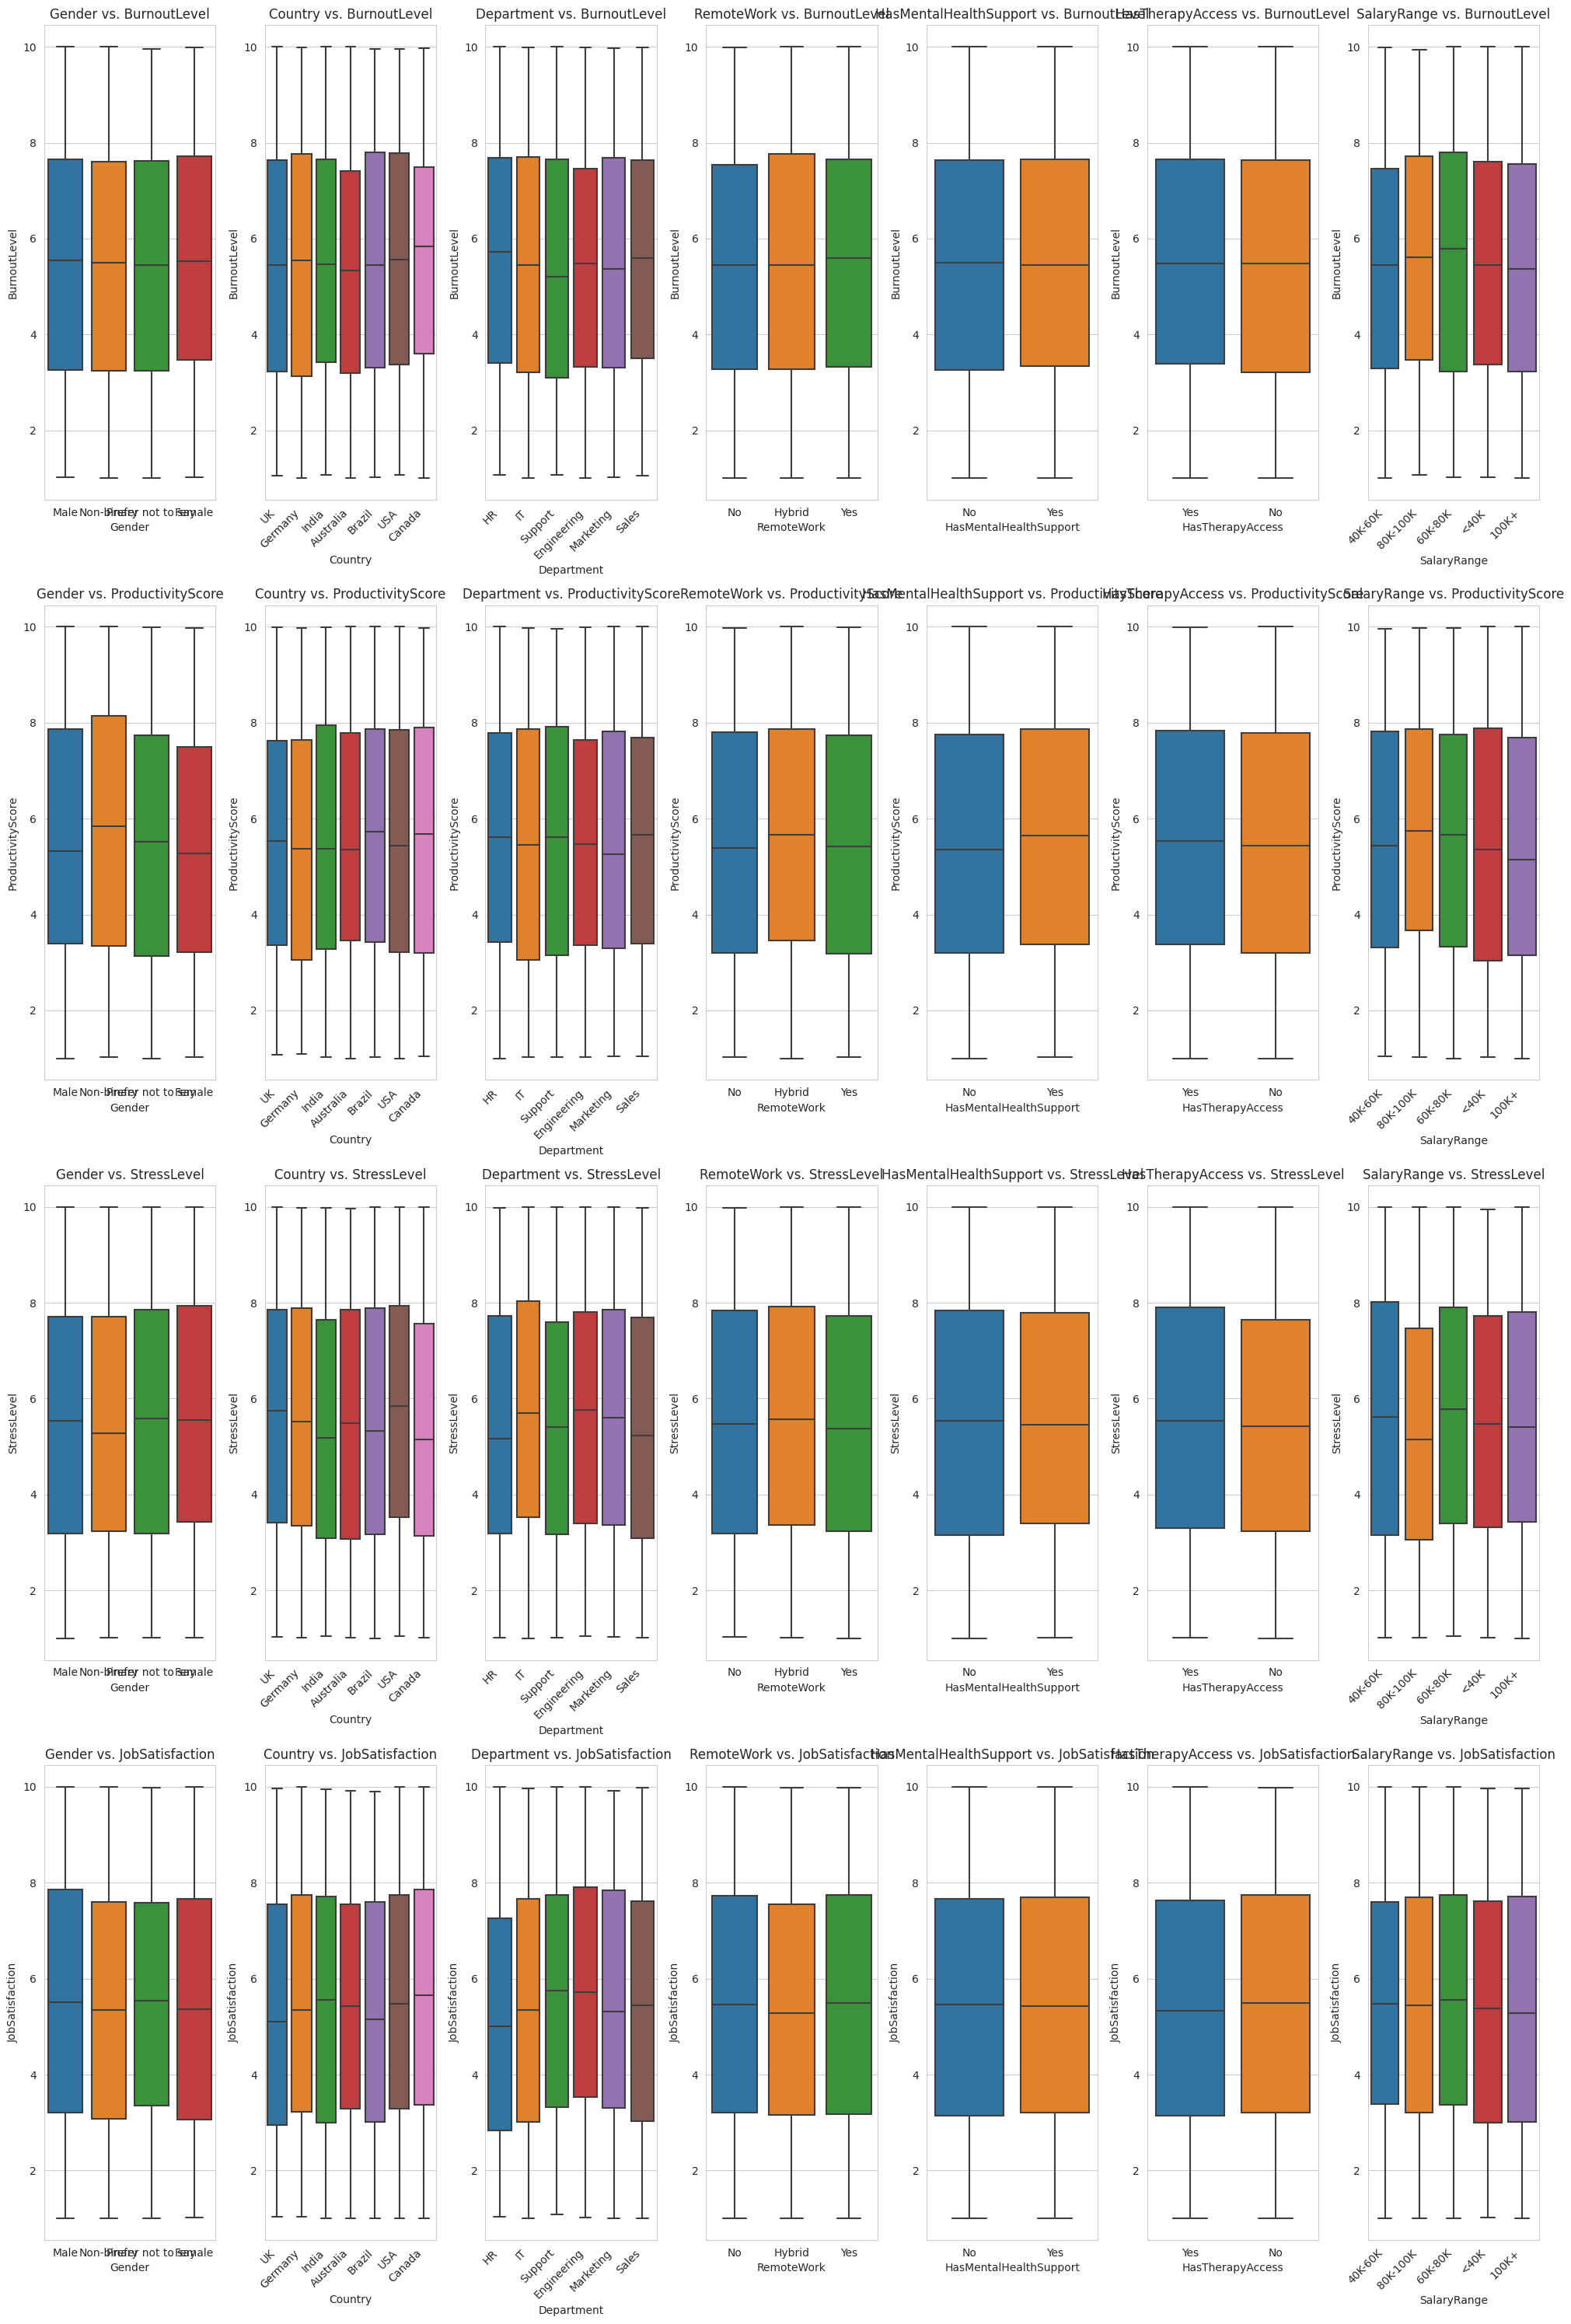

In [12]:
plt.figure(figsize=(20, 30))
for i, target in enumerate(target_variables):
    for j, feature in enumerate(selected_categorical_features):
        plot_num = i * len(selected_categorical_features) + j + 1
        plt.subplot(len(target_variables), len(selected_categorical_features), plot_num)
        sns.boxplot(x=df[feature], y=df[target])
        plt.title(f'{feature} vs. {target}')
        plt.xlabel(feature)
        plt.ylabel(target)
        if feature in ['Country', 'JobRole', 'Department', 'SalaryRange']:
            plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Multivariate Analysis: Pair Plot (Subset of Features)

In [13]:
subset_features = [
    'BurnoutLevel',
    'StressLevel',
    'JobSatisfaction',
    'ProductivityScore',
    'WorkLifeBalanceScore',
    'BurnoutRisk'
]

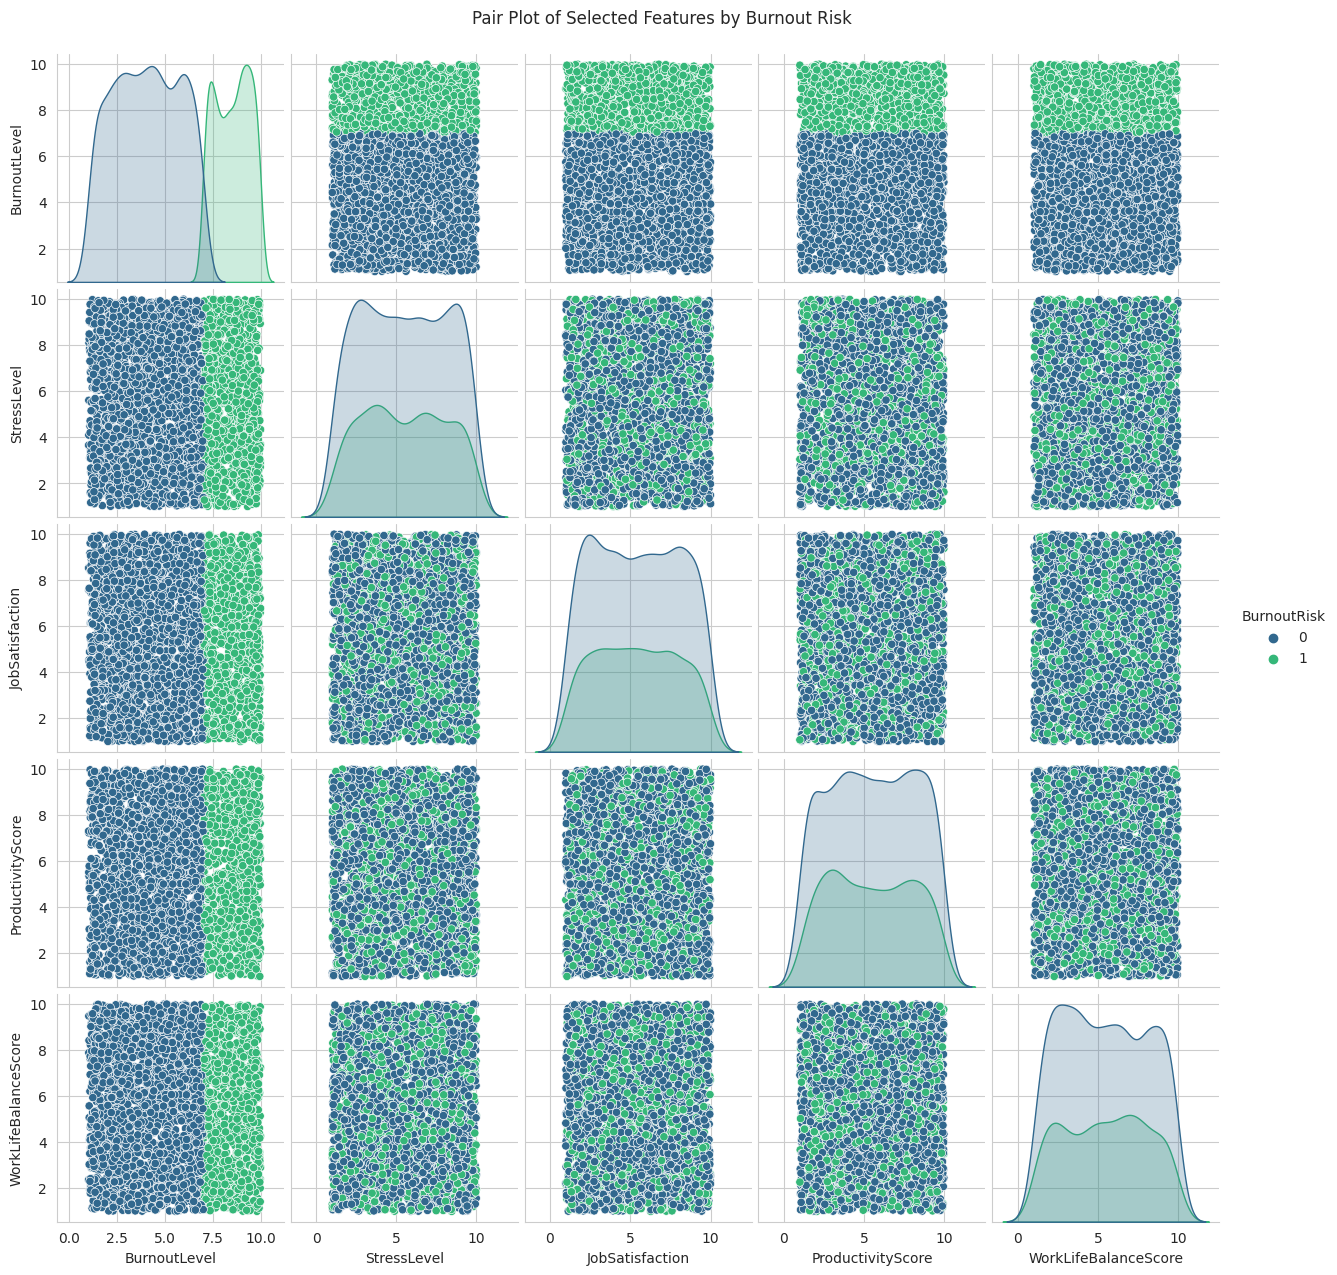

In [14]:
# Convert 'BurnoutRisk' to a categorical type for coloring in pairplot
df['BurnoutRisk'] = df['BurnoutRisk'].astype('category')

sns.pairplot(df[subset_features], hue='BurnoutRisk', palette='viridis')
plt.suptitle('Pair Plot of Selected Features by Burnout Risk', y=1.02)
plt.show()

In [15]:
# Convert 'BurnoutRisk' back to int type for subsequent modeling
df['BurnoutRisk'] = df['BurnoutRisk'].astype('int64')

### Predictive Analytics for BurnoutRisk - Data Preparation

In [16]:
# Define features (X) and target (y) for BurnoutRisk prediction
X = df.drop(['EmployeeID', 'BurnoutRisk'], axis=1) # EmployeeID is an identifier, BurnoutRisk is the target
y = df['BurnoutRisk']

In [17]:
# Apply Label Encoding to categorical features
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2100, 23)
Shape of X_test: (900, 23)
Shape of y_train: (2100,)
Shape of y_test: (900,)


### Predictive Analytics for BurnoutRisk - Model Training and Evaluation

This section trains a RandomForestClassifier model on the prepared training data
and evaluates its performance on the test set. Key metrics like accuracy, precision, recall,
and F1-score are reported to assess the model's predictive capability for 'BurnoutRisk'.

In [19]:
# Initialize and train the RandomForestClassifier
model_burnout_risk = RandomForestClassifier(n_estimators=100, random_state=42)
model_burnout_risk.fit(X_train, y_train)

# Make predictions on the test set
y_pred_burnout_risk = model_burnout_risk.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_burnout_risk)
report = classification_report(y_test, y_pred_burnout_risk)

print("\nModel Evaluation Results for BurnoutRisk:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Model Evaluation Results for BurnoutRisk:
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       606
           1       1.00      1.00      1.00       294

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



### Predictive Analytics for BurnoutRisk - Feature Importance

This section extracts and visualizes the feature importances from the trained RandomForestClassifier.
Feature importance helps to identify which variables contribute most significantly to the model's predictions of 'BurnoutRisk', highlighting the most impactful factors.

In [20]:
# Get feature importances
feature_importances_burnout_risk = model_burnout_risk.feature_importances_
features_burnout_risk = X.columns
importance_df_burnout_risk = pd.DataFrame({'Feature': features_burnout_risk, 'Importance': feature_importances_burnout_risk})
importance_df_burnout_risk = importance_df_burnout_risk.sort_values(by='Importance', ascending=False)

print("\nTop 10 Feature Importances for Burnout Risk Prediction:")
print(importance_df_burnout_risk.head(10))


Top 10 Feature Importances for Burnout Risk Prediction:
                 Feature  Importance
8           BurnoutLevel    0.844058
16   ManagerSupportScore    0.012382
22     CareerGrowthScore    0.011338
11     ProductivityScore    0.011203
20  WorkLifeBalanceScore    0.011129
9        JobSatisfaction    0.010873
10           StressLevel    0.010194
13   PhysicalActivityHrs    0.009468
14           CommuteTime    0.009140
12            SleepHours    0.009114


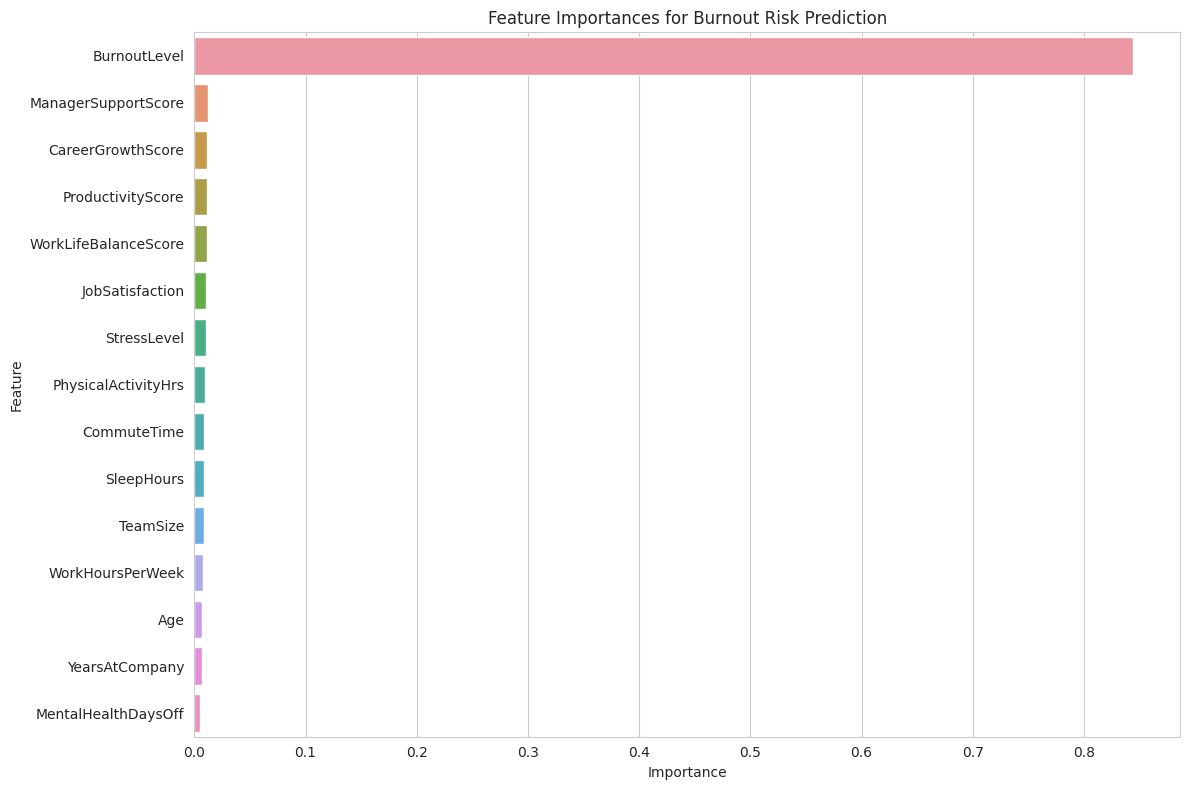

In [21]:
# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_burnout_risk.head(15))
plt.title('Feature Importances for Burnout Risk Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Burnout Risk Prediction:
For predicting BurnoutRisk, Random Forest Classifier achieved an exceptionally high accuracy (1.0). The feature importance analysis revealed that BurnoutLevel was the overwhelmingly dominant predictor, which is expected given that BurnoutRisk is likely derived directly from BurnoutLevel in this synthetic dataset. While this provides a highly accurate prediction of risk based on current burnout levels, it underscores the need to understand the drivers of BurnoutLevel itself.

### Predictive Analytics for BurnoutLevel - Data Preparation (Regression)
This section prepares the dataset for predicting 'BurnoutLevel' using a regression model.
It involves defining 'BurnoutLevel' as the target variable (y_burnout) and the remaining features (X_burnout).
Categorical features are encoded, and the data is split into training and testing sets.

In [22]:
# Define features (X_burnout) and target (y_burnout) for BurnoutLevel prediction
X_burnout = df.drop(['EmployeeID', 'BurnoutLevel', 'BurnoutRisk'], axis=1) # Exclude EmployeeID, BurnoutLevel itself, and BurnoutRisk (as it is likely derived from BurnoutLevel)
y_burnout = df['BurnoutLevel']

# Apply Label Encoding to categorical features in X_burnout
for col in X_burnout.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_burnout[col] = le.fit_transform(X_burnout[col])

# Split the data into training and testing sets for BurnoutLevel prediction
X_train_burnout, X_test_burnout, y_train_burnout, y_test_burnout = train_test_split(
    X_burnout, y_burnout, test_size=0.3, random_state=42
)

print("Shape of X_train_burnout:", X_train_burnout.shape)
print("Shape of X_test_burnout:", X_test_burnout.shape)
print("Shape of y_train_burnout:", y_train_burnout.shape)
print("Shape of y_test_burnout:", y_test_burnout.shape)


Shape of X_train_burnout: (2100, 22)
Shape of X_test_burnout: (900, 22)
Shape of y_train_burnout: (2100,)
Shape of y_test_burnout: (900,)


### Predictive Analytics for BurnoutLevel - Model Training and Evaluation (Regression)
This section trains a RandomForestRegressor model to predict 'BurnoutLevel'and evaluates its performance using regression metrics such as R-squared, Mean Absolute Error (MAE),and Mean Squared Error (MSE).

In [23]:
# Initialize and train the RandomForestRegressor
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_burnout, y_train_burnout)

# Make predictions on the test set
y_pred_burnout = reg_model.predict(X_test_burnout)

# Evaluate the regression model
mae = mean_absolute_error(y_test_burnout, y_pred_burnout)
mse = mean_squared_error(y_test_burnout, y_pred_burnout)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_burnout, y_pred_burnout)

print("\nRegression Model Evaluation Results for BurnoutLevel:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Regression Model Evaluation Results for BurnoutLevel:
Mean Absolute Error (MAE): 2.2334
Mean Squared Error (MSE): 6.7856
Root Mean Squared Error (RMSE): 2.6049
R-squared (R2): -0.0316


### Predictive Analytics for BurnoutLevel - Feature Importance
Description: This section extracts and visualizes the feature importances from the trained RandomForestRegressor.
These importances indicate which factors are most influential in determining an individual's 'BurnoutLevel', helping to understand the potential causes of burnout.

In [24]:
# Get feature importances
feature_importances_burnout = reg_model.feature_importances_
features_burnout = X_burnout.columns
importance_df_burnout = pd.DataFrame({'Feature': features_burnout, 'Importance': feature_importances_burnout})
importance_df_burnout = importance_df_burnout.sort_values(by='Importance', ascending=False)

print("\nTop 10 Feature Importances for BurnoutLevel Prediction:")
print(importance_df_burnout.head(10))


Top 10 Feature Importances for BurnoutLevel Prediction:
                 Feature  Importance
15   ManagerSupportScore    0.075059
10     ProductivityScore    0.073361
19  WorkLifeBalanceScore    0.071268
8        JobSatisfaction    0.068157
21     CareerGrowthScore    0.066994
12   PhysicalActivityHrs    0.065605
9            StressLevel    0.065484
13           CommuteTime    0.062897
20              TeamSize    0.057789
11            SleepHours    0.055767


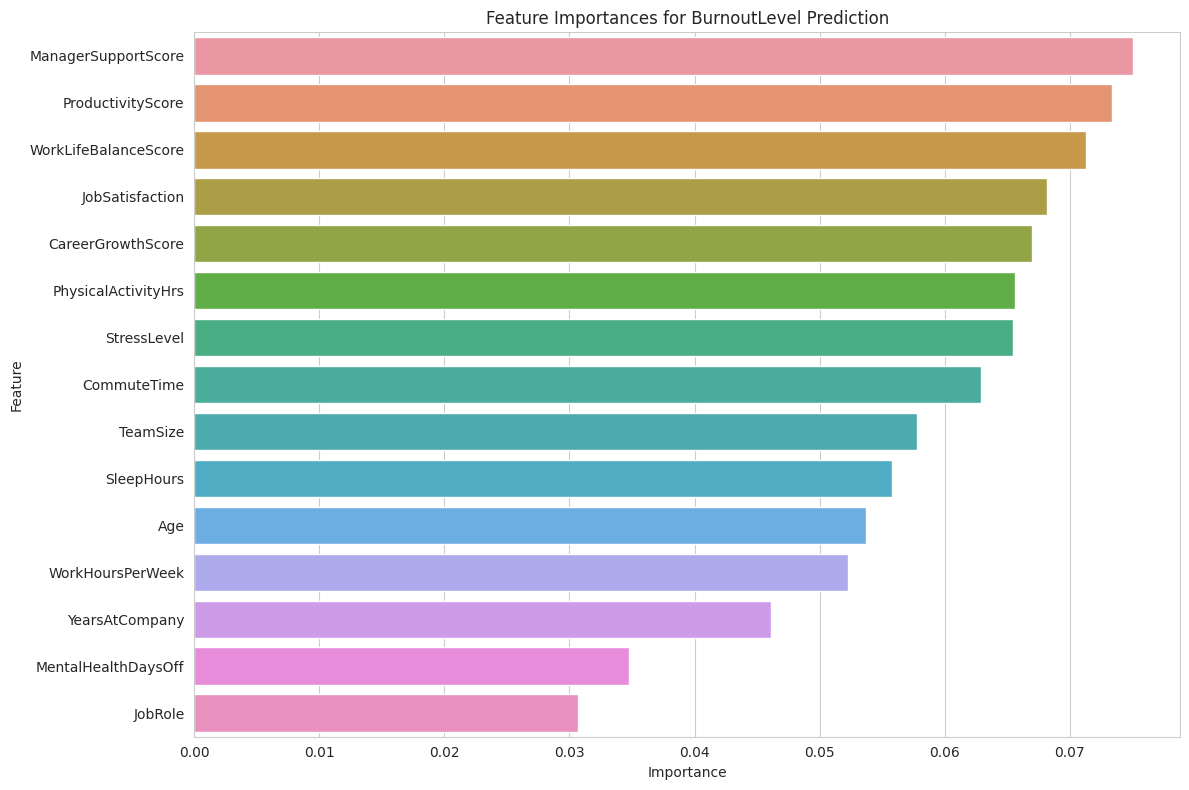

In [25]:
# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_burnout.head(15))
plt.title('Feature Importances for BurnoutLevel Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Understanding the Causes of Burnout (Burnout Level Prediction):
To delve deeper into what causes burnout, I trained a Random Forest Regressor to predict BurnoutLevel. Although the model's R-squared was low, indicating that the available features don't fully explain the variance in BurnoutLevel in a straightforward linear or simple non-linear fashion (possibly due to the synthetic data generation process), the feature importance analysis still provided valuable insights into the factors the model attempted to leverage. The most important features influencing BurnoutLevel were:

- ManagerSupportScore: Highlighting the critical role of management in employee well-being.

- ProductivityScore: Suggesting a complex interplay between perceived productivity and burnout.

- WorkLifeBalanceScore: Emphasizing its fundamental importance in preventing burnout.

- JobSatisfaction: A core component of employee well-being that impacts burnout.

- CareerGrowthScore: Indicating that opportunities for advancement contribute to lower burnout.